<a href="https://colab.research.google.com/github/pavanarya/AI-ML/blob/main/ML/3.%20FeatureEngineering/FeatureEngineering_PolynomialFeature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [6]:
import numpy as np

"""
#XOR Data
X_positive = np.array([(-1,-1),(1,1)])
X_negative = np.array([(-1,1),(1,-1)])
test_positive = np.array([(-1,-1),(1,1),(-1,-2),(-2,-1),(1,1),(2,2)])
test_negative = np.array([(-1,1),(1,-1),(-1,3),(-2,1),(-2,2),(-0.5,+0.5)])
"""

#https://openlearninglibrary.mit.edu/assets/courseware/v1/4b61c604452f9f0d62c39ec28345ce8e/asset-v1:MITx+6.036+1T2019+type@asset+block/images_feature_representation_2.png
X_positive = np.array([(1,1),(2,2)])
X_negative = np.array([(1,2),(2,1)])
test_positive = np.array([(-1,-1),(0,0),(1,1),(3,3),(2,2)])
test_negative = np.array([(1,-1),(2,-1),(3,0),(4,1),(-1,4),(0,5),(4,5)])

X = np.vstack((X_positive , X_negative))
y = np.array([1]*len(X_positive) + [-1]*len(X_negative))

print(X)
print(y)

[[1 1]
 [2 2]
 [1 2]
 [2 1]]
[ 1  1 -1 -1]


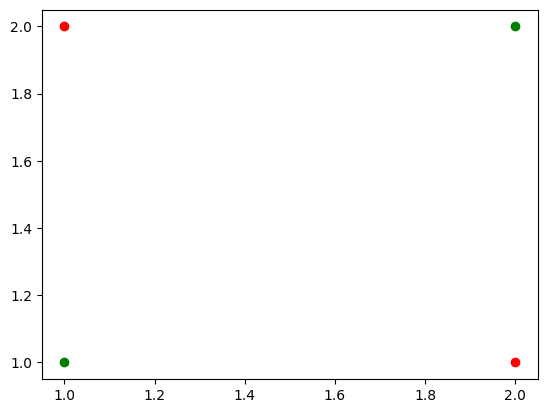

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X_positive[:,0], X_positive[:,1], color='green')
plt.scatter(X_negative[:,0], X_negative[:,1], color='red')
plt.show()

In [8]:
def plot_decision_boundary(X_positive,X_negative,coefficients, constant, iteration):
  plt.figure(figsize=(8,6))
  plt.scatter(X_positive[:, 0], X_positive[:, 1],marker='o', color='green', label='Positive')
  plt.scatter(X_negative[:, 0], X_negative[:, 1],marker='x', color='red', label='Negative')

  x_values = np.linspace(-3, 3, 2)
  if coefficients[1] != 0:
    y_values = -(coefficients[0] * x_values + constant) / coefficients[1]
    plt.plot(x_values, y_values, label=f'Iteration {iteration}')
  else:
    x_value = -constant/coefficients[0]
    plt.axvline(x=x_value, color='blue', linestyle='--', label=f'Iteration {iteration}')

  plt.xlabel("x1")
  plt.ylabel("x2")
  plt.xlim(-3, 3)
  plt.ylim(-4, 4)
  plt.title("Scatter Plot of Points")
  plt.legend()
  plt.grid(True)
  plt.show()

In [9]:
def Perceptron(X, y, epochs=10):
    best_coefficients = np.zeros(X.shape[1])
    best_constant =0
    best_accuracy = 0

    for epoch in range(epochs):
        for i in range(len(X)):
            x = X[i]
            val = np.dot(x, best_coefficients) + best_constant
            #print("Val: "+str(y[i] * val)+" Coeffcients:"+str(best_coefficients)+" Constant:"+str(best_constant)+"  X:"+str(x))
            if y[i] * val <= 0:
                best_coefficients += y[i]*x
                best_constant += y[i]
                #break;
            #plot_decision_boundary(best_coefficients, best_constant, epoch)
    return best_coefficients, best_constant

[ 0. -3.]
0


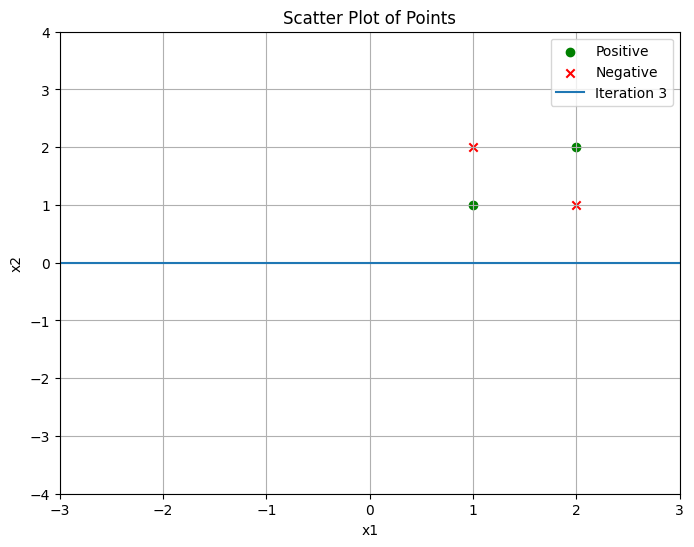

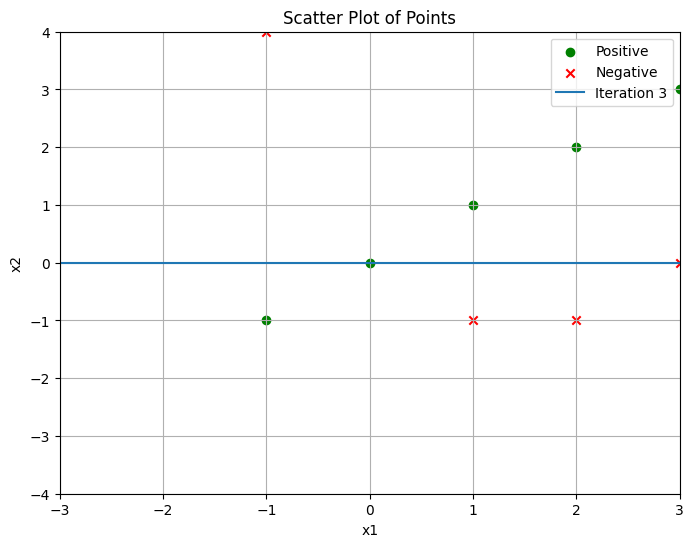

3.0 Point:[-1 -1]
0.0 Point:[0 0]
-3.0 Point:[1 1]
-9.0 Point:[3 3]
-6.0 Point:[2 2]
3.0 Point:[ 1 -1]
3.0 Point:[ 2 -1]
0.0 Point:[3 0]
-3.0 Point:[4 1]
-12.0 Point:[-1  4]
-15.0 Point:[0 5]
-15.0 Point:[4 5]
41.666666666666664


In [10]:
best_coefficients, best_constant = Perceptron(X, y,125)
print(best_coefficients)
print(best_constant)
plot_decision_boundary(X_positive,X_negative,best_coefficients, best_constant, 3)

plot_decision_boundary(test_positive,test_negative,best_coefficients, best_constant, 3)
test_X = np.vstack((test_positive , test_negative))
test_y = np.array([1]*len(test_positive) + [-1]*len(test_negative))

correct = 0
for i in range(len(test_X)):
  val = np.dot(test_X[i], best_coefficients) + best_constant
  if np.sign(val) == test_y[i]:
    correct += 1
  print(str(val)+" Point:"+str(test_X[i]))

print(correct*100/len(test_X))

In [11]:
#Feature engineering
from sklearn.preprocessing import PolynomialFeatures

a = np.array([[2,3],[1,2]])
print(a)
poly = PolynomialFeatures(degree=2)
a_poly = poly.fit_transform(a)
features = poly.get_feature_names_out(['a','b'])
print(a_poly)
print(features)

[[2 3]
 [1 2]]
[[1. 2. 3. 4. 6. 9.]
 [1. 1. 2. 1. 2. 4.]]
['1' 'a' 'b' 'a^2' 'a b' 'b^2']


In [12]:
def acuracy(data_X,data_y):
  poly_data_X = poly.fit_transform(data_X)
  correct = 0
  for i in range(len(poly_data_X)):
    val = np.dot(poly_data_X[i], best_coefficients) + best_constant
    if np.sign(val) == data_y[i]:
      correct += 1
    #print("Expected: "+str(data_y[i])+"      "+str(val)+"                  Point:"+str(data_X[i]))
  #print(correct*100/len(data_X))
  return correct*100/len(data_X)

training accuracy: 100.0
------------------------------
Testing Accuracy: 91.66666666666667


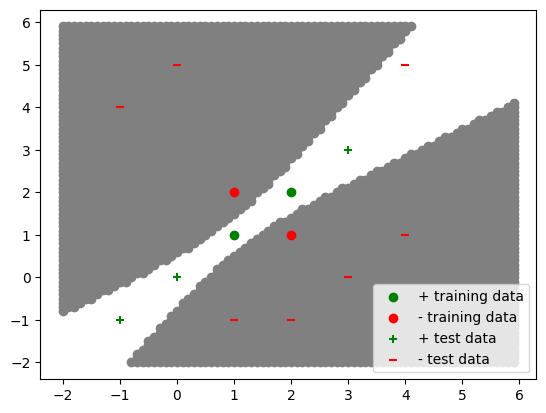

'\nfor k in range(1500):\n  best_coefficients, best_constant = Perceptron(a_poly, y,k)\n  train_accuracy = acuracy(X,y)\n  if train_accuracy!=None and train_accuracy > 99:\n    print(best_coefficients)\n    print(best_constant)\n    print(k)\n\n    #best_coefficients = (1,-1,-1,-5,11,-5)\n    #best_constant=1\n\n    train_accuracy = acuracy(X,y)\n    print("------------------------------")\n\n    test_X = np.vstack((test_positive , test_negative))\n    test_y = np.array([1]*len(test_positive) + [-1]*len(test_negative))\n    test_accuracy = acuracy(test_X,test_y)\n\n    plot_perceptron_boundary()\n    break\n'

In [29]:
from sklearn.preprocessing import PolynomialFeatures

a = np.array(X)
poly = PolynomialFeatures(degree=2)
a_poly = poly.fit_transform(a)

best_coefficients, best_constant = Perceptron(a_poly, y,65)
train_accuracy = acuracy(X,y)
print("training accuracy: "+str(train_accuracy))

#best_coefficients = (1,-1,-1,-5,11,-5)
#best_constant=1

train_accuracy = acuracy(X,y)
print("------------------------------")

test_X = np.vstack((test_positive , test_negative))
test_y = np.array([1]*len(test_positive) + [-1]*len(test_negative))
test_accuracy = acuracy(test_X,test_y)
print("Testing Accuracy: "+str(test_accuracy))

plot_perceptron_boundary()


"""
for k in range(1500):
  best_coefficients, best_constant = Perceptron(a_poly, y,k)
  train_accuracy = acuracy(X,y)
  if train_accuracy!=None and train_accuracy > 99:
    print(best_coefficients)
    print(best_constant)
    print(k)

    #best_coefficients = (1,-1,-1,-5,11,-5)
    #best_constant=1

    train_accuracy = acuracy(X,y)
    print("------------------------------")

    test_X = np.vstack((test_positive , test_negative))
    test_y = np.array([1]*len(test_positive) + [-1]*len(test_negative))
    test_accuracy = acuracy(test_X,test_y)

    plot_perceptron_boundary()
    break
"""

In [28]:
def plot_perceptron_boundary():
  #trying to identify boundary
  points =[]
  for xi in np.arange(-2,6,0.1):
    for yi in np.arange(-2,6,0.1):
      points.append([xi,yi])
  points = np.array(points)

  all_graph_points_poly = poly.fit_transform(points)

  positives_items=[]
  negative_items=[]
  for i in range(len(all_graph_points_poly)):
    val = np.dot(all_graph_points_poly[i], best_coefficients) + best_constant
    if np.sign(val) == 1:
      positives_items.append(points[i])
    else:
      negative_items.append(points[i])

  positives_items_1 = np.array(positives_items)
  negative_items_1 = np.array(negative_items)

  plt.scatter(positives_items_1[:,0], positives_items_1[:,1], color='white')
  plt.scatter(negative_items_1[:,0], negative_items_1[:,1], color='grey')

  plt.scatter(X_positive[:,0], X_positive[:,1], color='green',label="+ training data")
  plt.scatter(X_negative[:,0], X_negative[:,1], color='red',label="- training data")

  plt.scatter(test_positive[:,0], test_positive[:,1], color='green',marker="+", label="+ test data")
  plt.scatter(test_negative[:,0], test_negative[:,1], color='red',marker="_", label="- test data")

  plt.legend() # Show the legend
  plt.show()
  plt.show()

In [ ]:
# prompt: all legend matplotlib

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# ... (Your existing code)

def plot_decision_boundary(X_positive,X_negative,coefficients, constant, iteration):
  plt.figure(figsize=(8,6))
  plt.scatter(X_positive[:, 0], X_positive[:, 1],marker='o', color='green', label='Positive Training Points')
  plt.scatter(X_negative[:, 0], X_negative[:, 1],marker='x', color='red', label='Negative Training Points')

  # ... (Your existing code for plotting the decision boundary)

  plt.xlabel("x1")
  plt.ylabel("x2")
  plt.xlim(-3, 3)
  plt.ylim(-4, 4)
  plt.title("Scatter Plot of Points")
  plt.legend() # Show the legend
  plt.grid(True)
  plt.show()

# ... (Your existing code)

def plot_perceptron_boundary():
  # ... (Your existing code)

  plt.scatter(positives_items_1[:,0], positives_items_1[:,1], color='white', label='Positive Region')
  plt.scatter(negative_items_1[:,0], negative_items_1[:,1], color='grey', label='Negative Region')

  plt.scatter(X_positive[:,0], X_positive[:,1], color='green', label='Positive Training Points')
  plt.scatter(X_negative[:,0], X_negative[:,1], color='red', label='Negative Training Points')

  plt.scatter(test_positive[:,0], test_positive[:,1], color='green',marker="+", label='Positive Test Points')
  plt.scatter(test_negative[:,0], test_negative[:,1], color='red',marker="_", label='Negative Test Points')

  plt.legend() # Show the legend
  plt.show()


https://openlearninglibrary.mit.edu/assets/courseware/v1/4288137b7bd7f6b7a431b5b6c9f90b85/asset-v1:MITx+6.036+1T2019+type@asset+block/images_feature_representation_1.png